### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

### Load Data

In [2]:
df = pd.read_csv('sample_data/online_shoppers_intention.csv')

In [3]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1719,1,6.0,0,0.0,16,608.833333,0.011765,0.026667,52.700521,0.0,Mar,3,2,1,11,Returning_Visitor,False,True
3779,5,131.2,3,27.0,21,893.450000,0.017391,0.020652,7.091478,0.0,May,3,2,3,4,Returning_Visitor,True,True
11025,3,215.0,0,0.0,53,1481.429167,0.001852,0.012346,56.317601,0.0,Nov,1,8,1,11,Returning_Visitor,True,True
2404,0,0.0,0,0.0,10,196.500000,0.044444,0.066667,0.000000,0.6,May,2,2,1,3,Returning_Visitor,False,False
11041,0,0.0,1,0.0,77,1266.094048,0.002597,0.023632,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False


### Duplicated Handling

In [4]:
df.duplicated().sum()

125

In [5]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [6]:
nums = ['Administrative',
        'Administrative_Duration',
        'Informational',
        'Informational_Duration',
        'ProductRelated',
        'ProductRelated_Duration',
        'BounceRates',
        'ExitRates',
        'PageValues',
        'SpecialDay']

nums2 = ['Administrative',
        'Administrative_Duration',
        'Informational',
        'Informational_Duration',
        'ProductRelated',
        'ProductRelated_Duration',
        'ExitRates',
        'PageValues',
         'SpecialDay']

### Outliers Handling

In [7]:
# Run onces!
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df[col])) 
    filtered_entries = (zscore < 3) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 12205
Jumlah baris setelah memfilter outlier: 10020


### Split Train-Test Data

In [8]:
from sklearn.model_selection import train_test_split
x = df.drop(['Revenue','BounceRates','OperatingSystems','Browser','Region','TrafficType','Weekend'], axis=1)
y = df[['Revenue']]
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=42)

print (len(x_train))
print (len(x_test))

7014
3006


In [9]:
y_train.value_counts()

Revenue
False      5990
True       1024
dtype: int64

### Feature Transformation

In [10]:
#for i in range(0, len(nums)):
 #   x_train[nums[i]] = np.log(x_train[nums[i]] + 1)

In [11]:
#for i in range(0, len(nums)):
#    x_test[nums[i]] = np.log(x_test[nums[i]] + 1)

In [12]:
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
for i in range(0, len(nums2)):
    x_train[nums2[i]] = StandardScaler().fit_transform(x_train[nums2[i]].values.reshape(len(x_train[nums2[i]]), 1))

In [13]:
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
for i in range(0, len(nums2)):
    x_test[nums2[i]] = StandardScaler().fit_transform(x_test[nums2[i]].values.reshape(len(x_test[nums2[i]]), 1))

### Feature Encoding

In [14]:
#weekend_mapping = {
 #  False: 0,
  #  True: 1
#}

revenue_mapping = {
    False: 0,
    True: 1
}

In [15]:
y_train['Revenue'] = y_train['Revenue'].map(revenue_mapping)
y_test['Revenue'] = y_test['Revenue'].map(revenue_mapping)

#x_train['Weekend'] = x_train['Weekend'].map(weekend_mapping)
#x_test['Weekend'] = x_test['Weekend'].map(weekend_mapping)


In [16]:
x_train = pd.get_dummies(data=x_train, 
                    columns=['Month','VisitorType'], 
                    drop_first=True)

In [17]:
x_test = pd.get_dummies(data=x_test, 
                    columns=['Month','VisitorType'], 
                    drop_first=True)

### Imbalanced Handling

In [18]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_SMOTE, y_train_SMOTE= smote.fit_resample(x_train, y_train)

In [19]:
y_train_SMOTE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11980 entries, 0 to 11979
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Revenue  11980 non-null  int64
dtypes: int64(1)
memory usage: 93.7 KB


### Modeling dan Evaluation

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    y_pred_train = model.predict(xtrain)
    ypred = model.predict(xtest)
    print("Accuracy (Train Set): %.2f" % accuracy_score(ytrain, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Train Set): %.2f" % precision_score(ytrain, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Train Set): %.2f" % recall_score(ytrain, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Train Set): %.2f" % f1_score(ytrain, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba1 = model.predict_proba(xtrain)
    print("AUC Train: %.2f" % roc_auc_score(ytrain, y_pred_proba1[:, 1]))
    y_pred_proba2 = model.predict_proba(xtest)
    print("AUC Test: %.2f" % roc_auc_score(ytest, y_pred_proba2[:, 1]))
    

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

#### 1. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(x_train_SMOTE, y_train_SMOTE)

LogisticRegression(random_state=42)

In [22]:
from sklearn.metrics import roc_auc_score
y_pred = model.predict(x_test)
print(roc_auc_score(y_test, y_pred))

y_pred_train = model.predict(x_train_SMOTE)
print(roc_auc_score(y_train_SMOTE, y_pred_train))

0.7886532807621304
0.8392320534223707


In [23]:
eval_classification(model, x_train_SMOTE, y_train_SMOTE, x_test, y_test)

Accuracy (Train Set): 0.84
Accuracy (Test Set): 0.84
Precision (Train Set): 0.86
Precision (Test Set): 0.47
Recall (Train Set): 0.80
Recall (Test Set): 0.71
F1-Score (Train Set): 0.83
F1-Score (Test Set): 0.56
AUC Train: 0.92
AUC Test: 0.88


In [49]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

# Fitting Model & Evaluation
model.fit(x_train_SMOTE, y_train_SMOTE)
y_pred = model.predict(x_test)
eval_classification(model, x_train_SMOTE, y_train_SMOTE, x_test, y_test)

Accuracy (Train Set): 0.82
Accuracy (Test Set): 0.87
Precision (Train Set): 0.88
Precision (Test Set): 0.53
Recall (Train Set): 0.74
Recall (Test Set): 0.72
F1-Score (Train Set): 0.81
F1-Score (Test Set): 0.61
AUC Train: 0.90
AUC Test: 0.88


In [50]:
print('Best penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 0.002


#### 2. Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_train_SMOTE,y_train_SMOTE)

y_pred = dtc.predict(x_test)
eval_classification(dtc, x_train_SMOTE, y_train_SMOTE, x_test, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.82
Precision (Train Set): 1.00
Precision (Test Set): 0.41
Recall (Train Set): 1.00
Recall (Test Set): 0.69
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.52
AUC Train: 1.00
AUC Test: 0.77


In [52]:
# Tuning 1
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dtc = DecisionTreeClassifier(random_state=42)
dtc_rs = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
dtc_rs.fit(x_train_SMOTE, y_train_SMOTE)

# Predict & Evaluation
y_pred = dtc_rs.predict(x_test)#Check performa dari model
eval_classification(dtc_rs, x_train_SMOTE, y_train_SMOTE, x_test, y_test)

Accuracy (Train Set): 0.87
Accuracy (Test Set): 0.83
Precision (Train Set): 0.87
Precision (Test Set): 0.43
Recall (Train Set): 0.87
Recall (Test Set): 0.74
F1-Score (Train Set): 0.87
F1-Score (Test Set): 0.55
AUC Train: 0.95
AUC Test: 0.87


In [53]:
print('Best max_depth:', dtc_rs.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', dtc_rs.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', dtc_rs.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', dtc_rs.best_estimator_.get_params()['max_features'])

Best max_depth: 23
Best min_samples_split: 10
Best min_samples_leaf: 20
Best max_features: sqrt


In [54]:
# Tuning 2
# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split


hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dtc = DecisionTreeClassifier(random_state=42, class_weight={0:0.02,1:0.98})
dtc_rs = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
dtc_rs.fit(x_train_SMOTE, y_train_SMOTE)

# Predict & Evaluation
y_pred = dtc_rs.predict(x_test)#Check performa dari model
eval_classification(dtc_rs, x_train_SMOTE, y_train_SMOTE, x_test, y_test)

Accuracy (Train Set): 0.87
Accuracy (Test Set): 0.83
Precision (Train Set): 0.87
Precision (Test Set): 0.43
Recall (Train Set): 0.87
Recall (Test Set): 0.74
F1-Score (Train Set): 0.87
F1-Score (Test Set): 0.55
AUC Train: 0.95
AUC Test: 0.87


#### 3. K-Neighbors Classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train_SMOTE,y_train_SMOTE)


y_pred = model.predict(x_test)
eval_classification(model, x_train_SMOTE, y_train_SMOTE, x_test, y_test)

Accuracy (Train Set): 0.92
Accuracy (Test Set): 0.80
Precision (Train Set): 0.87
Precision (Test Set): 0.39
Recall (Train Set): 0.98
Recall (Test Set): 0.73
F1-Score (Train Set): 0.93
F1-Score (Test Set): 0.51
AUC Train: 0.99
AUC Test: 0.84


In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

# Fit Model & Evaluasi
model.fit(x_train_SMOTE, y_train_SMOTE)
y_pred = model.predict(x_test)
eval_classification(model, x_train_SMOTE, y_train_SMOTE, x_test, y_test)

Accuracy (Train Set): 0.93
Accuracy (Test Set): 0.83
Precision (Train Set): 0.89
Precision (Test Set): 0.43
Recall (Train Set): 0.99
Recall (Test Set): 0.74
F1-Score (Train Set): 0.94
F1-Score (Test Set): 0.54
AUC Train: 0.99
AUC Test: 0.84


In [57]:
print('Best n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', model.best_estimator_.get_params()['p'])
print('Best algorithm:', model.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 5
Best p: 1
Best algorithm: ball_tree


#### 4. Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train_SMOTE,y_train_SMOTE)


y_pred = model.predict(x_test)
eval_classification(model, x_train_SMOTE, y_train_SMOTE, x_test, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.86
Precision (Train Set): 1.00
Precision (Test Set): 0.51
Recall (Train Set): 1.00
Recall (Test Set): 0.79
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.62
AUC Train: 1.00
AUC Test: 0.91


In [59]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.ensemble import RandomForestClassifier

# List of hyperparameter
n_estimators = list(range(1,200))
max_features =['sqrt', 'log2']
criterion = ['gini', 'entropy', 'log_loss']
hyperparameters = dict(n_estimators=n_estimators, max_features=max_features, criterion=criterion)

# Init model
rf = RandomForestClassifier()
model = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

# Fit Model & Evaluasi
model.fit(x_train_SMOTE, y_train_SMOTE)
y_pred = model.predict(x_test)
eval_classification(model, x_train_SMOTE, y_train_SMOTE, x_test, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.86
Precision (Train Set): 1.00
Precision (Test Set): 0.49
Recall (Train Set): 1.00
Recall (Test Set): 0.79
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.61
AUC Train: 1.00
AUC Test: 0.91


In [60]:
print('Best n_estimators:', model.best_estimator_.get_params()['n_estimators'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])
print('Best criterion:', model.best_estimator_.get_params()['criterion'])

Best n_estimators: 132
Best max_features: log2
Best criterion: gini


#### 5. Bernoulli Naive Bayes

In [61]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train_SMOTE,y_train_SMOTE)


y_pred = model.predict(x_test)
eval_classification(model, x_train_SMOTE, y_train_SMOTE, x_test, y_test)

Accuracy (Train Set): 0.82
Accuracy (Test Set): 0.79
Precision (Train Set): 0.80
Precision (Test Set): 0.39
Recall (Train Set): 0.83
Recall (Test Set): 0.81
F1-Score (Train Set): 0.82
F1-Score (Test Set): 0.53
AUC Train: 0.88
AUC Test: 0.86


In [62]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.naive_bayes import BernoulliNB

# List of hyperparameter
alpha = [0.002, 0.01, 0.3, 0.5, 2,3,5, 1.5]
fit_prior = [True, False]
binarize = [0.01, 0.02, 0.03, 0.0]
hyperparameters = dict(fit_prior=fit_prior, alpha=alpha, binarize=binarize)

# Init model
bnb = BernoulliNB()
model = RandomizedSearchCV(bnb, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

# Fit Model & Evaluasi
model.fit(x_train_SMOTE, y_train_SMOTE)
y_pred = model.predict(x_test)
eval_classification(model, x_train_SMOTE, y_train_SMOTE, x_test, y_test)

Accuracy (Train Set): 0.82
Accuracy (Test Set): 0.79
Precision (Train Set): 0.81
Precision (Test Set): 0.39
Recall (Train Set): 0.84
Recall (Test Set): 0.81
F1-Score (Train Set): 0.82
F1-Score (Test Set): 0.53
AUC Train: 0.88
AUC Test: 0.86


In [63]:
print('Best fit_prior:', model.best_estimator_.get_params()['fit_prior'])
print('Best alpha:', model.best_estimator_.get_params()['alpha'])
print('Best binarize:', model.best_estimator_.get_params()['binarize'])

Best fit_prior: True
Best alpha: 2
Best binarize: 0.03


### Feature Importance

Text(0.5, 1.0, 'Feature Importance Score')

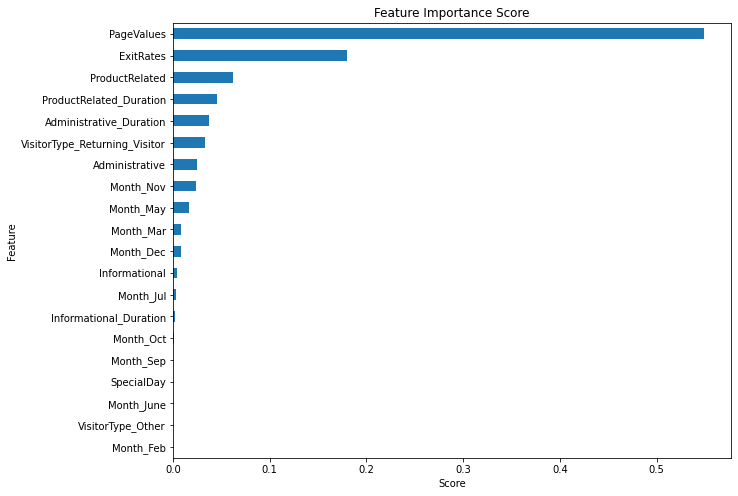

In [68]:
feat_importances = pd.Series(dtc_rs.best_estimator_.feature_importances_, index=x_train_SMOTE.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance Score')